#### Analysis #1:  
Looking at the Temp vs. Latitude graph.  One noteable trend is that the temperature goes up towards the equator (latitude of 0).  And then decreases on either side.  This would suggest that it is hotter in the middle of the planet.  Possibly due to the fact that the equator receives the most light from the sun.  Hence the trend in the graph.

#### Analysis #2:
Looking at the cloudiness and wind data, there are no noticeable changes in weather with change in latitude.  What we do notice though, is that the clusters of dots as we get closer to the 30-40 degree latitudes.  This would suggest that there are more data points at this range due to the amount of land mass focused in this latitude range.  Due to this uneven distrubution of land mass, most (if not all) of the data could be potentially biased and/or skewed.


In [2]:
import json
import pandas as pd
import numpy as np
from citipy import citipy
from random import randint
from datetime import datetime
import matplotlib.pyplot as plt
import requests as req
import time
import os
import seaborn as sns

### Collecting random cities - Applying CitiPy
Used random number generator to generated random numbers between lat/long coordinates.  Numbers are then applied to citipy to find the nearest city to random coordinates, citipy uses kdtree to locate the nearest city.  Citipy takes in lat/long coordinates and locates the nearest city based on the coordinates.  Citipy returns city and country.  Return values are then placed in a tuple (used to compare BOTH city and country) then appended to a list, the function is set in a while-loop with an if-statement.  Reason behind this is to eliminate the possibility of cities having the same name but are in different countries.  Hence, with a tuple, both values can be compared and then added if it is not already in the list. 

In [3]:
combined_list = []

while len(combined_list) < 510:
    lat_range = randint(-90,90)
    lng_range = randint(-180, 180)
    city = citipy.nearest_city(lat_range, lng_range)
    city_name = city.city_name
    country_name = city.country_code
    combined_ = (city_name, country_name) #'combined' is a tuple, used to compare BOTH city,country (in case of same city names, but different countries)
    if combined_ not in combined_list:
        combined_list.append(combined_)

### Setting list of cities - Unzipping into two lists
List of tuples (city, country) was used to compare and prevent same cities from being added to the list.  Now it is pulled apart into two lists (unzipped), later it will be used to set the columns for the dataframe (city, country).

In [4]:
city_list, country_list = zip(*combined_list)
city_list = list(city_list)
country_list = list(country_list)

### Creating search parameters for OWM // Storing returned information into lists (ie. Temps, Clouds, Humidity) // Printing status update on process
First, I set the usual parameters (api key and url), but then I use a UNIX timestamp to get past data.  In this case, it will be July 27, 2017 at approximately 2pm, because the data **must be consistent to the same hour within a day**.  Otherwise, if data was collected based on current data, then other time zones will be in different parts of the day, and it would skew the data.
Second, I looped through the list of tuples with city names and country names (combined_list).  Then used each city and country as a parameter to be searched through OWM.  Then those names would be used to print status updates.  
Third, the try-except conditional was used instead of if-else for simplicity purposes.  An if-else could be used, if going that route, a 'response[200]' can be checked under the if-statement.  The except part, will append 'none' to the dataframe, OWM will not have weather on all cities, hence the error will notify the user with a print statement.  A counter ('number') is used to count the number of cities.

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather"
api_key = "520a1531cd2ce1c453e489ffd47eb034"

time_str1 = "Jul 27 13:50:06 +0000 2017"

converted_time1 = datetime.strptime(time_str1,
                                    "%b %d %H:%M:%S %z %Y")

start_unixtime = str(int(time.mktime(converted_time1.timetuple())))

lat_data = []
lng_data = []
temp_data = []
humid_data = []
cloud_data = []
wind_data = []
number = 1
for each_city, each_country in combined_list:
    print("Collecting data on city #" + str(number) + ': ' + str(each_city) + ', ' + str(each_country))
    try:
        params = {'appid': api_key,
                  'q': each_city + ',' + each_country,
                  'type': 'hour',
                  'start': start_unixtime,
                  'cnt': 1,
                  'units': 'metric'}
    
        weather_response = req.get(url, params)
        print("Requested URL: " + str(weather_response.url))
        weather_json = weather_response.json()
        lat_data.append(weather_json['coord']['lat'])
        lng_data.append(weather_json['coord']['lat'])
        temp_data.append(weather_json['main']['temp'])
        humid_data.append(weather_json['main']['humidity'])
        cloud_data.append(weather_json['clouds']['all'])
        wind_data.append(weather_json['wind']['speed'])
    except:
        print("OpenWeather has no information on city, appending NaN to " + str(each_city) + ", " + str(each_country))
        lat_data.append(None)
        lng_data.append(None)
        temp_data.append(None)
        humid_data.append(None)
        cloud_data.append(None)
        wind_data.append(None)
    number += 1
    
## print(json.dumps(weather_json, indent=4, sort_keys=True))
## print(lat_data)
## print(temp_data)
## print(humid_data)
## print(cloud_data)
## print(wind_data)


Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=sorel%2Cca&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=nikolayevsk-na-amure%2Cru&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=dikson%2Cru&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=abalak%2Cne&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=castro%2Ccl&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=paamiut%2Cgl&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http:

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=bluff%2Cnz&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to bluff, nz
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=albany%2Cau&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=correntina%2Cbr&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=mount+gambier%2Cau&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=vestmannaeyjar%2Cis&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to vestmannaeyjar, is
Requested URL: http://api.openweat

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=labutta%2Cmm&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to labutta, mm
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=kutum%2Csd&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to kutum, sd
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=puerto+del+rosario%2Ces&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to puerto del rosario, es
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=bargal%2Cso&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to bargal, so
Requested URL: http://api.openweathermap.org/data/2.5/weathe

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=faanui%2Cpf&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to faanui, pf
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=port+elizabeth%2Cza&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to port elizabeth, za
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=tessalit%2Cml&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to tessalit, ml
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=hithadhoo%2Cmv&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to hithadhoo, mv
Requested URL: http://api.openweathermap.org/data/2.5/weat

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=mildura%2Cau&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to mildura, au
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=doha%2Ckw&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to doha, kw
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=sentyabrskiy%2Cru&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to sentyabrskiy, ru
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=muroto%2Cjp&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to muroto, jp
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a15

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=pevek%2Cru&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to pevek, ru
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=afmadu%2Cso&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to afmadu, so
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=hare+bay%2Cca&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to hare bay, ca
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=thunder+bay%2Cca&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=zalaszentgrot%2Chu&type=hour&start=1501188

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=benghazi%2Cly&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=alice+springs%2Cau&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=te+anau%2Cnz&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to te anau, nz
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=kavaratti%2Cin&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to kavaratti, in
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=deer+lake%2Cca&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city,

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=olafsvik%2Cis&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to olafsvik, is
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=piacabucu%2Cbr&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to piacabucu, br
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=kingaroy%2Cau&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to kingaroy, au
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=wanaka%2Cnz&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to wanaka, nz
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=52

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=bend%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=pszczyna%2Cpl&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to pszczyna, pl
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=codrington%2Cag&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to codrington, ag
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=forbes%2Cau&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to forbes, au
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=chikoy%2Cru&type=hour&start=1501188606&

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=san+cristobal%2Cec&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to san cristobal, ec
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=mys+shmidta%2Cru&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to mys shmidta, ru
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=nimaparha%2Cin&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to nimaparha, in
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=salalah%2Com&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=cherskiy%2Cru&type

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=iqaluit%2Cca&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=nedjo%2Cet&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to nedjo, et
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=nueva+imperial%2Ccl&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=matagami%2Cca&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=xinqing%2Ccn&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=amapa%2Cbr&typ

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=klaksvik%2Cfo&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=cadiz%2Ces&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=kavieng%2Cpg&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=umea%2Cse&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=sitka%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=udachnyy%2Cru&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openwea

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=madimba%2Ctz&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=nizwa%2Com&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=tautira%2Cpf&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=mrirt%2Cma&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to mrirt, ma
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=pital%2Ccr&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=bria%2Ccf&type=hour&start=

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=winnemucca%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=kahului%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=olden%2Cno&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to olden, no
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=fortuna%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=saint-leu%2Cre&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=mehamn%2Cno&type=

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=taltal%2Ccl&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=santo+domingo%2Cec&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to santo domingo, ec
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=pismo+beach%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=bahia+honda%2Ccu&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=sinnamary%2Cgf&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034

### Creating the Dataframe
All of the lists are pulled together into a dataframe.  Then printing out a CSV file.

In [6]:
weather_dict = {"Latitude": lat_data, "City": city_list, "Country": country_list, "Temperature": temp_data, 
                "Humidity": humid_data, "Cloudiness": cloud_data, "Wind Speed": wind_data, "Longitude": lng_data}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,sorel,90.0,ca,73.0,46.04,46.04,0.00,1.21
1,nikolayevsk-na-amure,8.0,ru,100.0,53.14,53.14,-21.00,6.99
2,dikson,68.0,ru,96.0,73.51,73.51,-4.73,7.64
3,abalak,36.0,ne,22.0,15.45,15.45,25.48,4.71
4,castro,0.0,cl,84.0,-42.47,-42.47,8.15,3.49


In [7]:
output = os.path.join('weatherPy_Hw6.csv')
weather_df.to_csv(output, header=True)

### Drop cities not found, reset index
Any city that is not in the OWM database will need to be deleted before running matplotlib/seaborn for analysis.  Interestingly, when applying formulas or manipulating the dataframe, a "SettingWithCopyWarning" kept popping up.  After some research, it is possible that manipulating a dataframe python makes a copy of the original, so when values are dropped and added, it compares the data to the original dataframe and notices that the indices don't match, so it throws a warning.  Unless the index is reset, the warning goes away.  Hence reset_index is needed.

In [8]:
weather_df = weather_df.dropna(axis=0, how='any')
weather_df = weather_df.reset_index(drop=True) #must reset index, or else run into SettingWithCopyWarning!!
weather_df.head()

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,sorel,90.0,ca,73.0,46.04,46.04,0.00,1.21
1,nikolayevsk-na-amure,8.0,ru,100.0,53.14,53.14,-21.00,6.99
2,dikson,68.0,ru,96.0,73.51,73.51,-4.73,7.64
3,abalak,36.0,ne,22.0,15.45,15.45,25.48,4.71
4,castro,0.0,cl,84.0,-42.47,-42.47,8.15,3.49


### Applying formula - Convert to Fahrenheit
While getting the 'SettingWithCopyWarning', I experimented with three different ways to calculate the temperature in fahrenheit.  I thought it had something to do with my function design, hence the replicates.  I ended up choosing the lambda function because it's new.  After new column was created with Fahrenheit temperatures.  The temperatures in celsius column was dropped and then columns were reorganized.

In [9]:
#Option #1:
Fahrenheit = lambda x: x*(9/5)+32
weather_df['Temperature (F)'] = weather_df['Temperature'].apply(Fahrenheit)
weather_df.head()

# Option #2:
# weather_df['Temperature (F)'] = weather_df.loc[:, 'Temperature']*(9/5)+32
# weather_df
# Option #3:
# weather_df['Temperature (F)'] = weather_df['Temperature'] *(9/5) +32
# weather_df

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed,Temperature (F)
0,sorel,90.0,ca,73.0,46.04,46.04,0.00,1.21,32.000
1,nikolayevsk-na-amure,8.0,ru,100.0,53.14,53.14,-21.00,6.99,-5.800
2,dikson,68.0,ru,96.0,73.51,73.51,-4.73,7.64,23.486
3,abalak,36.0,ne,22.0,15.45,15.45,25.48,4.71,77.864
4,castro,0.0,cl,84.0,-42.47,-42.47,8.15,3.49,46.670


In [10]:
weather_df.drop(['Temperature'], axis = 1, inplace = True)
weather_df = weather_df[['City', 'Country', 'Latitude', 'Longitude', 'Temperature (F)', 'Humidity', 'Wind Speed', 'Cloudiness']]
weather_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity,Wind Speed,Cloudiness
0,sorel,ca,46.04,46.04,32.000,73.0,1.21,90.0
1,nikolayevsk-na-amure,ru,53.14,53.14,-5.800,100.0,6.99,8.0
2,dikson,ru,73.51,73.51,23.486,96.0,7.64,68.0
3,abalak,ne,15.45,15.45,77.864,22.0,4.71,36.0
4,castro,cl,-42.47,-42.47,46.670,84.0,3.49,0.0


## Scatter plots using Matplotlib/Seaborn libraries
Created scatterplots for Humidity, Temperature, Cloudiness, and Wind Speed compared to Latitude.  Each chart is saved as PNG file and then shown.  The X and Y limits are defined according to the max and min values within the respective columns, then added some units to prevent points for getting cut off.

In [11]:
plt.scatter(weather_df['Latitude'], weather_df['Temperature (F)'], marker="o", 
            facecolors="red", edgecolors="black", alpha=0.95, s=30)
plt.ylim(weather_df['Temperature (F)'].min() - 20, weather_df['Temperature (F)'].max() + 20)
plt.xlim(weather_df['Latitude'].min()-15, weather_df['Latitude'].max()+15)

plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

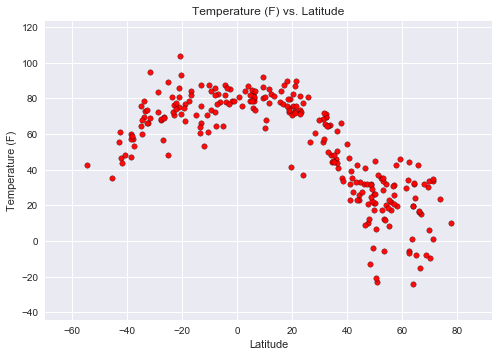

In [12]:
plt.savefig("Temperature_vs_Latitude.png")
plt.show()

In [13]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], marker="o", 
            facecolors="red", edgecolors="black", alpha=0.95, s=30)
plt.ylim(weather_df['Humidity'].min() - 25, weather_df['Humidity'].max() + 25)
plt.xlim(weather_df['Latitude'].min()-15, weather_df['Latitude'].max()+15)

plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

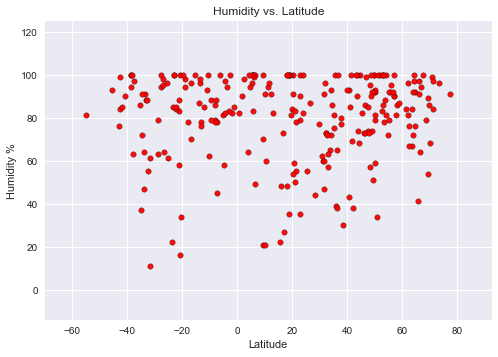

In [14]:
plt.savefig("Humidity_vs_Latitude.png")
plt.show()

In [15]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'], marker="o", 
            facecolors="red", edgecolors="black", alpha=0.95, s=30)
plt.ylim(weather_df['Wind Speed'].min() - 3, weather_df['Wind Speed'].max() + 3)
plt.xlim(weather_df['Latitude'].min()-15, weather_df['Latitude'].max()+15)

plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

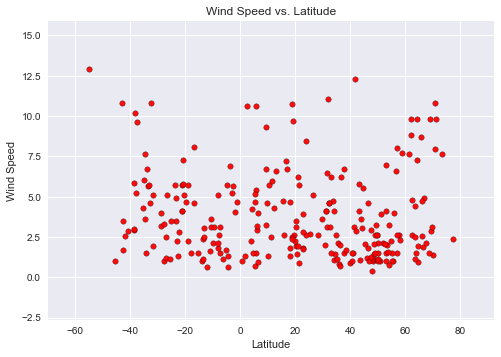

In [16]:
plt.savefig("WindSpeed_vs_Latitude.png")
plt.show()

In [17]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], marker="o", 
            facecolors="red", edgecolors="black", alpha=0.95, s=30)
plt.ylim(weather_df['Cloudiness'].min() - 3, weather_df['Cloudiness'].max() + 3)
plt.xlim(weather_df['Latitude'].min()-15, weather_df['Latitude'].max()+15)

plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

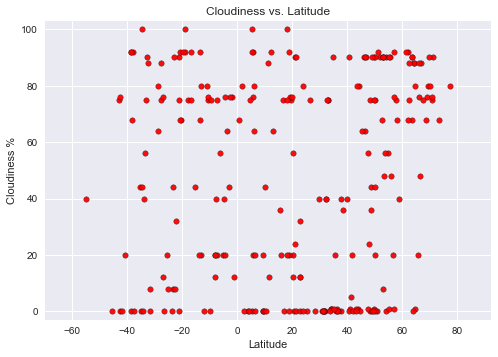

In [18]:
plt.savefig("Cloudiness_vs_Latitude.png")
plt.show()